# Lab 5: Wide and Deep Networks For Predicting Diamond Prices

A machine learning engineer is in a long-term committed relationship and is planning to propose to their partner with diamond ring. All that they know is that their partner wants a round cut diamond and isn't specific on the cut quality, color, and clarity. The engineer wants to develop several wide and deep neural networks to predict whether a round cut diamond is over or under a budget of $10,000. The dataset provided has 11 numerical and categorical attributes. 

## Preparation

In order to properly implement that data into a deep and wide neural network, we first must preprocess the data. All of the numerical, continuous data will be processed through a standard scalar while the categorical data will be label encoded and eventually one hot encoded. The feature that will be targeted is the price, which we will first split into two classes, under-budget and over-budget, using the quanization threshold of $10,000 followed by a label encoding and one hot encoding. We chose to separate our training and testing data using the train-test-split function from SciKitLearn because even though out target classes are imbalanced our dataset is so large that we don't need to split the whole dataset several times to help balance the classes. 

## Statistical Metric Selection

The statistical metric that will give us the best picture of how each of these three wide and deep netowrks are peforming is the Mcnemar Test. The Mcnemar Test is the industry standard metric for evaluating performance between two classifiers. The decision on which classifier is better will be dependent on the evaluation criteria. 

## Crossed Linear Classifier Selection

According to liscensed diamond broker, the most important categorical feature when purchasing or selling a diamond is the cut. Therefore, when we want to consider which features should be combined into cross products, it is important to have cut heavily weighted. Furthermore, you will need ensure that each crossed column has cut present or we risk our algorithm performing optimally. 

In [1]:
import pandas as pd

df = pd.read_csv('Diamond Prices2022.csv')
df.drop(df.columns[df.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53943 entries, 0 to 53942
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53943 non-null  float64
 1   cut      53943 non-null  object 
 2   color    53943 non-null  object 
 3   clarity  53943 non-null  object 
 4   depth    53943 non-null  float64
 5   table    53943 non-null  float64
 6   price    53943 non-null  int64  
 7   x        53943 non-null  float64
 8   y        53943 non-null  float64
 9   z        53943 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [2]:
import sklearn
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit

df_target = df['price']
df_data = df.drop(['price'], axis=1)

X = df_data.copy()
y = df_target.copy()

X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X,y, test_size=0.2)
y_train.describe()



count    43154.000000
mean      3935.267994
std       3994.342120
min        326.000000
25%        950.250000
50%       2409.000000
75%       5327.000000
max      18823.000000
Name: price, dtype: float64

In [3]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

y_train = pd.cut(y_train, [0,10000,1e6],labels = ['under-budget', 'over-budget'], precision=0)
y_test = pd.cut(y_test, [0,10000,1e6],labels = ['under-budget', 'over-budget'], precision=0)

y_train.value_counts()


under-budget    38980
over-budget      4174
Name: price, dtype: int64

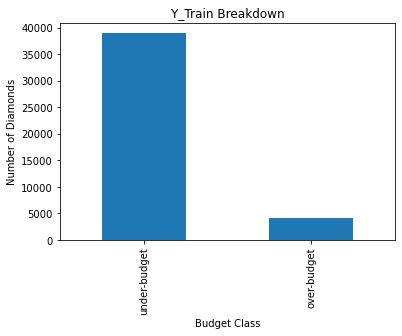

In [4]:
import matplotlib.pyplot as plt
count = y_train.value_counts()
count.plot.bar()
plt.title('Y_Train Breakdown')
plt.ylabel('Number of Diamonds')
plt.xlabel('Budget Class')
plt.show()

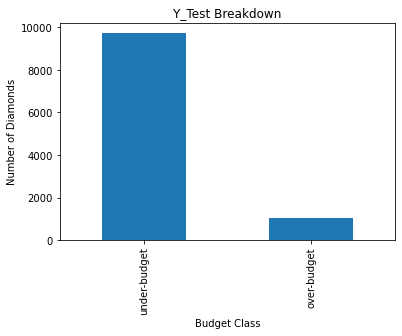

In [5]:
y_test.value_counts()
count = y_test.value_counts()
count.plot.bar()
plt.title('Y_Test Breakdown')
plt.ylabel('Number of Diamonds')
plt.xlabel('Budget Class')
plt.show()

In [6]:
numeric_headers = ['carat', 'depth', 'table', 'x', 'y', 'z']

ss = StandardScaler()
X_train[numeric_headers] = ss.fit_transform(X_train[numeric_headers].values)
X_test[numeric_headers] = ss.transform(X_test[numeric_headers].values)

In [7]:
X_train.head()

,carat,cut,color,clarity,depth,table,x,y,z
10368,0.552048,Premium,F,SI1,0.100988,0.247390,0.711974,0.740282,0.734774
20101,0.889275,Premium,F,VS2,0.170858,0.247390,1.006213,1.011614,1.017050
3012,0.046207,Ideal,E,VS1,-1.226535,-1.094565,0.399903,0.302651,0.198449
51653,-1.134087,Ideal,G,VVS2,0.380467,-0.647246,-1.481444,-1.430370,-1.410525
26856,2.744023,Premium,E,SI2,0.799685,0.694708,2.183170,2.096940,2.244952


In [8]:
categorical_headers = ['cut', 'color', 'clarity']

for col in categorical_headers:
    X_train[col] = X_train[col].str.strip()
    X_test[col] = X_test[col].str.strip()
    lb = LabelEncoder()
    X_train[col+'_int'] = lb.fit_transform(X_train[col])
    X_test[col+'_int'] = lb.transform(X_test[col])

In [9]:
X_train.head()

,carat,cut,color,clarity,depth,table,x,y,z,cut_int,color_int,clarity_int
10368,0.552048,Premium,F,SI1,0.100988,0.247390,0.711974,0.740282,0.734774,3,2,2
20101,0.889275,Premium,F,VS2,0.170858,0.247390,1.006213,1.011614,1.017050,3,2,5
3012,0.046207,Ideal,E,VS1,-1.226535,-1.094565,0.399903,0.302651,0.198449,2,1,4
51653,-1.134087,Ideal,G,VVS2,0.380467,-0.647246,-1.481444,-1.430370,-1.410525,2,3,7
26856,2.744023,Premium,E,SI2,0.799685,0.694708,2.183170,2.096940,2.244952,3,1,3


In [10]:
categorical_headers_ints = [x +'_int' for x in categorical_headers]

In [11]:
tmp = LabelEncoder()
y_train = tmp.fit_transform(y_train)
y_test = tmp.transform(y_test)

In [268]:
np.array(np.unique(y_test, return_counts=True)).T

array([[   0, 1048],
       [   1, 9741]], dtype=int64)

## Wide and Deep Network Modeling

We will now begin modeling three wide and deep networks. The first two networks will differ by the selection of crossed features. The final network will differ from the first two networks by the addtion of more deep layers.  

In [15]:
from sklearn import metrics as mt
import tensorflow as tf
from tensorflow import keras 

print(tf.__version__)
print(keras.__version__)

2.9.1
2.9.0


In [16]:
from tensorflow.keras.layers import Dense, Activation, Input, Embedding, concatenate
from tensorflow.keras.models import Model

In [17]:
for col in categorical_headers:
    vals = X_train[col].unique()
    print(col,'has', len(vals), 'unique values:')
    print(vals)

cut has 5 unique values:
['Premium' 'Ideal' 'Good' 'Very Good' 'Fair']
color has 7 unique values:
['F' 'E' 'G' 'H' 'J' 'I' 'D']
clarity has 8 unique values:
['SI1' 'VS2' 'VS1' 'VVS2' 'SI2' 'VVS1' 'IF' 'I1']


In [19]:
import numpy as np
cols_list = ['cut','color','clarity']

# 1. create crossed labels by string join operation
X_crossed_train = X_train[cols_list].apply(lambda x: '_'.join(x), axis=1)
X_crossed_test = X_test[cols_list].apply(lambda x: '_'.join(x), axis=1)

# combine together for training
all_vals = np.hstack((X_crossed_train.to_numpy(),  X_crossed_test.to_numpy()))
#print(np.unique(all_vals))
    
# 2. encode as integers, stacking all possibilities
enc = LabelEncoder()
enc.fit(all_vals)

encoded_vals_train = enc.transform(X_crossed_train)
encoded_vals_test  = enc.transform(X_crossed_test)

print(np.min(encoded_vals_train), np.max(encoded_vals_train))

0 275


## Wide and Deep Model 1

In [236]:
cross_columns = [
                 ['cut', 'color'],
                 ['cut','clarity'],
                 #['color','clarity'],
                 #['cut','color','clarity'],
                ]

cross_col_df_names = []
for cols_list in cross_columns:
    # encode as ints for the embedding
    enc = LabelEncoder()
    
    # 1. create crossed labels by join operation
    X_crossed_train = X_train[cols_list].apply(lambda x: '_'.join(x), axis=1)
    X_crossed_test = X_test[cols_list].apply(lambda x: '_'.join(x), axis=1)
    
    # get a nice name for this new crossed column
    cross_col_name = '_'.join(cols_list)
    
    # 2. encode as integers, stacking all possibilities
    enc.fit(np.hstack((X_crossed_train.to_numpy(),  X_crossed_test.to_numpy())))
    
    # 3. Save into dataframe with new name
    X_train[cross_col_name] = enc.transform(X_crossed_train)
    X_test[cross_col_name] = enc.transform(X_crossed_test)
    
    # keep track of the new names of the crossed columns
    cross_col_df_names.append(cross_col_name) 
    
cross_col_df_names

['cut_color', 'cut_clarity']

In [237]:
X_train_cat = X_train[categorical_headers_ints].to_numpy() 
X_test_cat = X_test[categorical_headers_ints].to_numpy() 

In [238]:
X_train_num =  X_train[numeric_headers].to_numpy()
X_test_num = X_test[numeric_headers].to_numpy()

In [239]:
X_train_crossed = X_train[cross_col_df_names].to_numpy()
X_test_crossed = X_test[cross_col_df_names].to_numpy()

In [240]:
crossed_outputs = []

input_crossed = Input(shape=(X_train_crossed.shape[1],), dtype='int64', name='wide_inputs')
for idx,col in enumerate(cross_col_df_names):
    
    N = max(X_train[col].max(),X_test[col].max())+1
    
    x = tf.gather(input_crossed, idx, axis=1)
    
    x = Embedding(input_dim=N, 
                  output_dim=int(np.sqrt(N)), 
                  input_length=1, name=col+'_embed')(x)

    crossed_outputs.append(x)
    
wide_branch = concatenate(crossed_outputs, name='wide_concat')

all_deep_branch_outputs = []

input_cat = Input(shape=(X_train_cat.shape[1],), dtype='int64', name='categorical_input')
for idx,col in enumerate(categorical_headers_ints):
    
    N = max(X_train[col].max(),X_test[col].max())+1
    
    x = tf.gather(input_cat, idx, axis=1)
    
    x = Embedding(input_dim=N, 
                  output_dim=int(np.sqrt(N)), 
                  input_length=1, name=col+'_embed')(x)
    
    all_deep_branch_outputs.append(x)

input_num = Input(shape=(X_train_num.shape[1],), name='numerical_input')
x_dense = Dense(units=10, activation='relu',name='num_1')(input_num)
    
all_deep_branch_outputs.append(x_dense)

deep_branch = concatenate(all_deep_branch_outputs,name='concat_embeds')
deep_branch = Dense(units=20,activation='relu', name='deep1')(deep_branch)
#deep_branch = Dense(units=20,activation='relu', name='deep2')(deep_branch)
#deep_branch = Dense(units=10,activation='relu', name='deep3')(deep_branch)

final_branch = concatenate([wide_branch, deep_branch],
                           name='concat_deep_wide')
final_branch = Dense(units=1,activation='sigmoid',
                     name='combined')(final_branch)

model1 = Model(inputs=[input_crossed,input_cat,input_num], 
              outputs=final_branch)

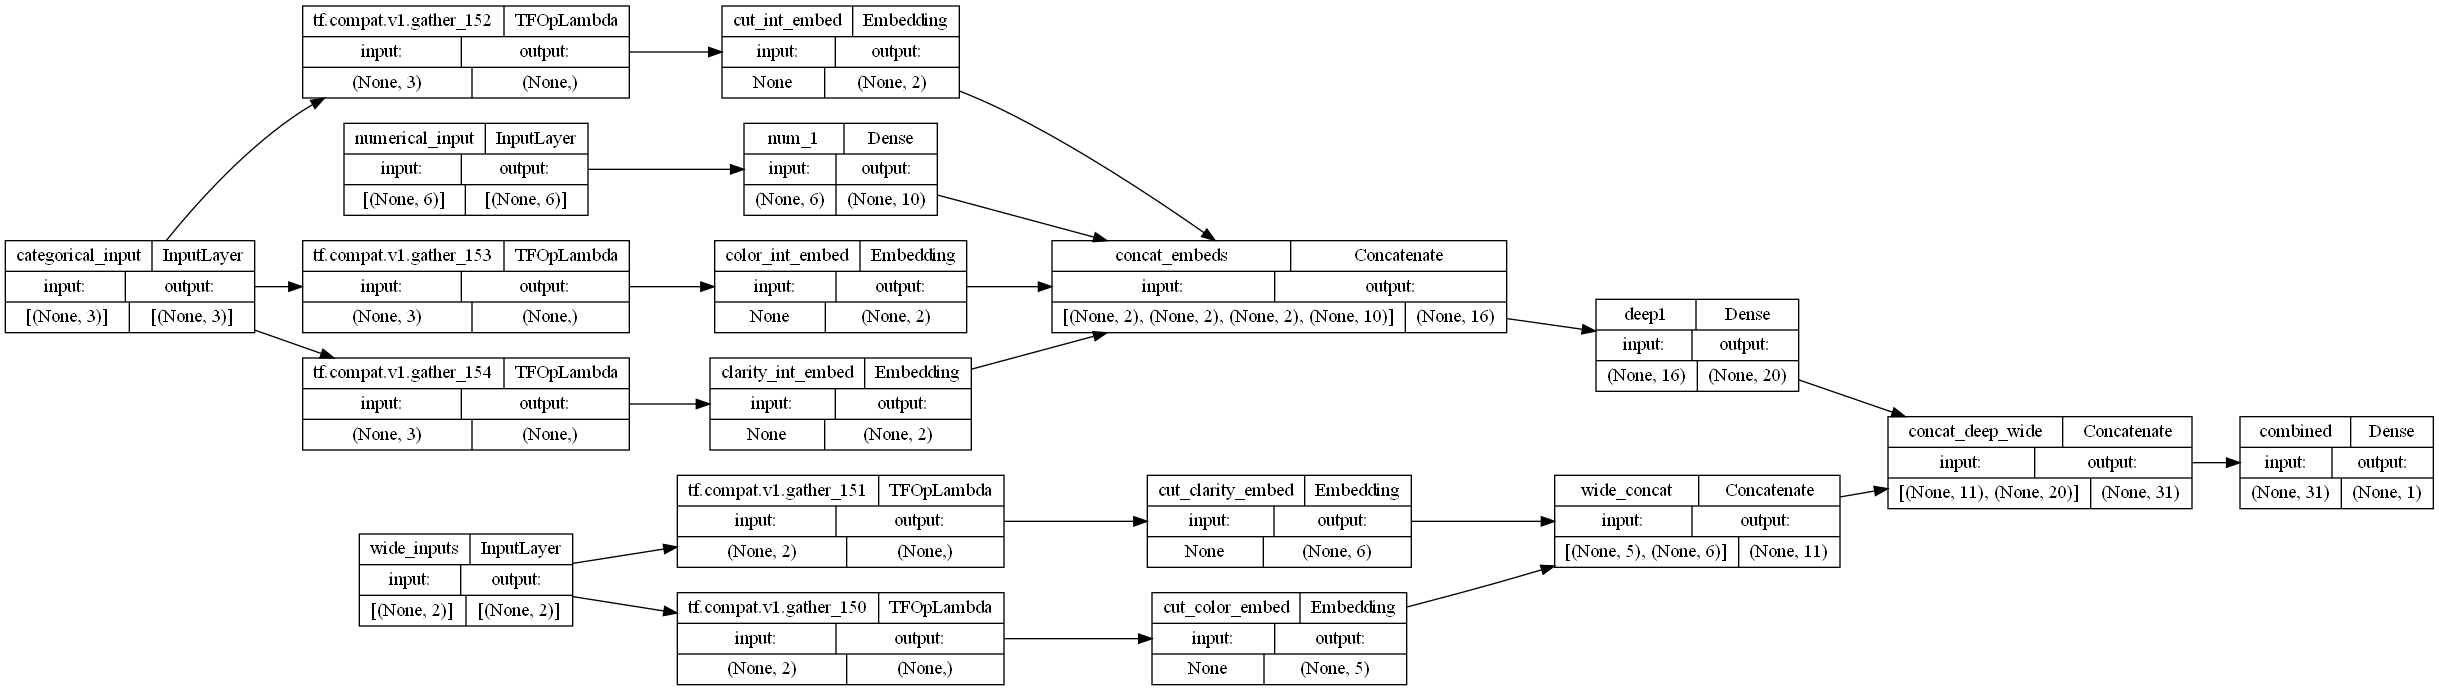

In [241]:
from tensorflow.keras.utils import plot_model
plot_model(
    model1, to_file='model.png', show_shapes=True, show_layer_names=True,
    rankdir='LR', expand_nested=False, dpi=96
)

In [242]:
%%time

model1.compile(optimizer='SGD',
              loss='mean_squared_error',
              metrics='Accuracy')

# lets also add the history variable to see how we are doing
# and lets add a validation set to keep track of our progress
history = model1.fit([X_train_crossed,X_train_cat,X_train_num],
                    y_train, 
                    epochs=30, 
                    batch_size=32, 
                    verbose=1, 
                    validation_data = ([X_test_crossed,X_test_cat,X_test_num],y_test))

Epoch 1/30
1349/1349 [==============================] - 6s 4ms/step - loss: 0.1075 - Accuracy: 0.8858 - val_loss: 0.0581 - val_Accuracy: 0.9379
Epoch 2/30
1349/1349 [==============================] - 6s 4ms/step - loss: 0.0473 - Accuracy: 0.9484 - val_loss: 0.0412 - val_Accuracy: 0.9512
Epoch 3/30
1349/1349 [==============================] - 5s 4ms/step - loss: 0.0381 - Accuracy: 0.9529 - val_loss: 0.0363 - val_Accuracy: 0.9540
Epoch 4/30
1349/1349 [==============================] - 5s 4ms/step - loss: 0.0348 - Accuracy: 0.9552 - val_loss: 0.0340 - val_Accuracy: 0.9548
Epoch 5/30
1349/1349 [==============================] - 5s 4ms/step - loss: 0.0331 - Accuracy: 0.9559 - val_loss: 0.0327 - val_Accuracy: 0.9561
Epoch 6/30
1349/1349 [==============================] - 5s 3ms/step - loss: 0.0320 - Accuracy: 0.9576 - val_loss: 0.0318 - val_Accuracy: 0.9580
Epoch 7/30
1349/1349 [==============================] - 4s 3ms/step - loss: 0.0311 - Accuracy: 0.9580 - val_loss: 0.0310 - val_Accuracy:

In [291]:
yhat1 = np.round(model1.predict([X_test_crossed,X_test_cat,X_test_num]))
print(mt.confusion_matrix(y_test,yhat))
print(mt.classification_report(y_test,yhat))

338/338 [==============================] - 1s 2ms/step
[[ 954   94]
 [ 101 9640]]
              precision    recall  f1-score   support

           0       0.90      0.91      0.91      1048
           1       0.99      0.99      0.99      9741

    accuracy                           0.98     10789
   macro avg       0.95      0.95      0.95     10789
weighted avg       0.98      0.98      0.98     10789



Text(0.5, 0, 'epochs')

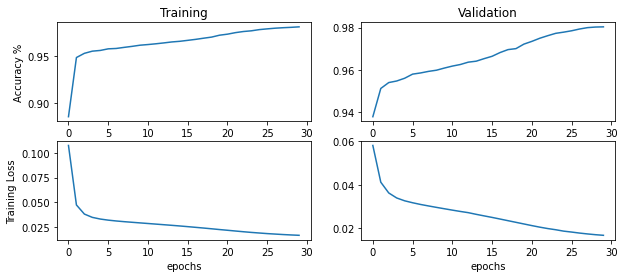

In [244]:
from matplotlib import pyplot as plt

%matplotlib inline

plt.figure(figsize=(10,4))
plt.subplot(2,2,1)
plt.plot(history.history['Accuracy'])

plt.ylabel('Accuracy %')
plt.title('Training')
plt.subplot(2,2,2)
plt.plot(history.history['val_Accuracy'])
plt.title('Validation')

plt.subplot(2,2,3)
plt.plot(history.history['loss'])
plt.ylabel('Training Loss')
plt.xlabel('epochs')

plt.subplot(2,2,4)
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')

## Wide and Deep Network 2 

[2 points] Investigate generalization performance by altering the number of layers in the deep branch of the network. Try at least two different number of layers. Use the method of cross validation and evaluation metric that you argued for at the beginning of the lab to select the number of layers that performs superiorly. 

In [245]:
cross_columns2 = [
                 #['cut', 'color'],
                 #['cut','clarity'],
                 ['color','clarity'],
                 ['cut','color','clarity'],
                ]

cross_col_df_names2 = []
for cols_list in cross_columns2:
    # encode as ints for the embedding
    enc = LabelEncoder()
    
    # 1. create crossed labels by join operation
    X_crossed_train = X_train[cols_list].apply(lambda x: '_'.join(x), axis=1)
    X_crossed_test = X_test[cols_list].apply(lambda x: '_'.join(x), axis=1)
    
    # get a nice name for this new crossed column
    cross_col_name = '_'.join(cols_list)
    
    # 2. encode as integers, stacking all possibilities
    enc.fit(np.hstack((X_crossed_train.to_numpy(),  X_crossed_test.to_numpy())))
    
    # 3. Save into dataframe with new name
    X_train[cross_col_name] = enc.transform(X_crossed_train)
    X_test[cross_col_name] = enc.transform(X_crossed_test)
    
    # keep track of the new names of the crossed columns
    cross_col_df_names2.append(cross_col_name) 
    
cross_col_df_names2

['color_clarity', 'cut_color_clarity']

In [246]:
X_train_crossed2 = X_train[cross_col_df_names].to_numpy()
X_test_crossed2 = X_test[cross_col_df_names].to_numpy()

In [247]:
crossed_outputs = []

input_crossed = Input(shape=(X_train_crossed.shape[1],), dtype='int64', name='wide_inputs')
for idx,col in enumerate(cross_col_df_names2):
    
    N = max(X_train[col].max(),X_test[col].max())+1
    
    x = tf.gather(input_crossed, idx, axis=1)
    
    x = Embedding(input_dim=N, 
                  output_dim=int(np.sqrt(N)), 
                  input_length=1, name=col+'_embed')(x)

    crossed_outputs.append(x)
    
wide_branch = concatenate(crossed_outputs, name='wide_concat')

all_deep_branch_outputs = []

input_cat = Input(shape=(X_train_cat.shape[1],), dtype='int64', name='categorical_input')
for idx,col in enumerate(categorical_headers_ints):
    
    N = max(X_train[col].max(),X_test[col].max())+1
    
    x = tf.gather(input_cat, idx, axis=1)
    
    x = Embedding(input_dim=N, 
                  output_dim=int(np.sqrt(N)), 
                  input_length=1, name=col+'_embed')(x)
    
    all_deep_branch_outputs.append(x)

input_num = Input(shape=(X_train_num.shape[1],), name='numerical_input')
x_dense = Dense(units=10, activation='relu',name='num_1')(input_num)
    
all_deep_branch_outputs.append(x_dense)

deep_branch = concatenate(all_deep_branch_outputs,name='concat_embeds')
deep_branch = Dense(units=20,activation='relu', name='deep1')(deep_branch)
#deep_branch = Dense(units=20,activation='relu', name='deep2')(deep_branch)
#deep_branch = Dense(units=10,activation='relu', name='deep3')(deep_branch)

final_branch = concatenate([wide_branch, deep_branch],
                           name='concat_deep_wide')
final_branch = Dense(units=1,activation='sigmoid',
                     name='combined')(final_branch)

model2 = Model(inputs=[input_crossed,input_cat,input_num], 
              outputs=final_branch)

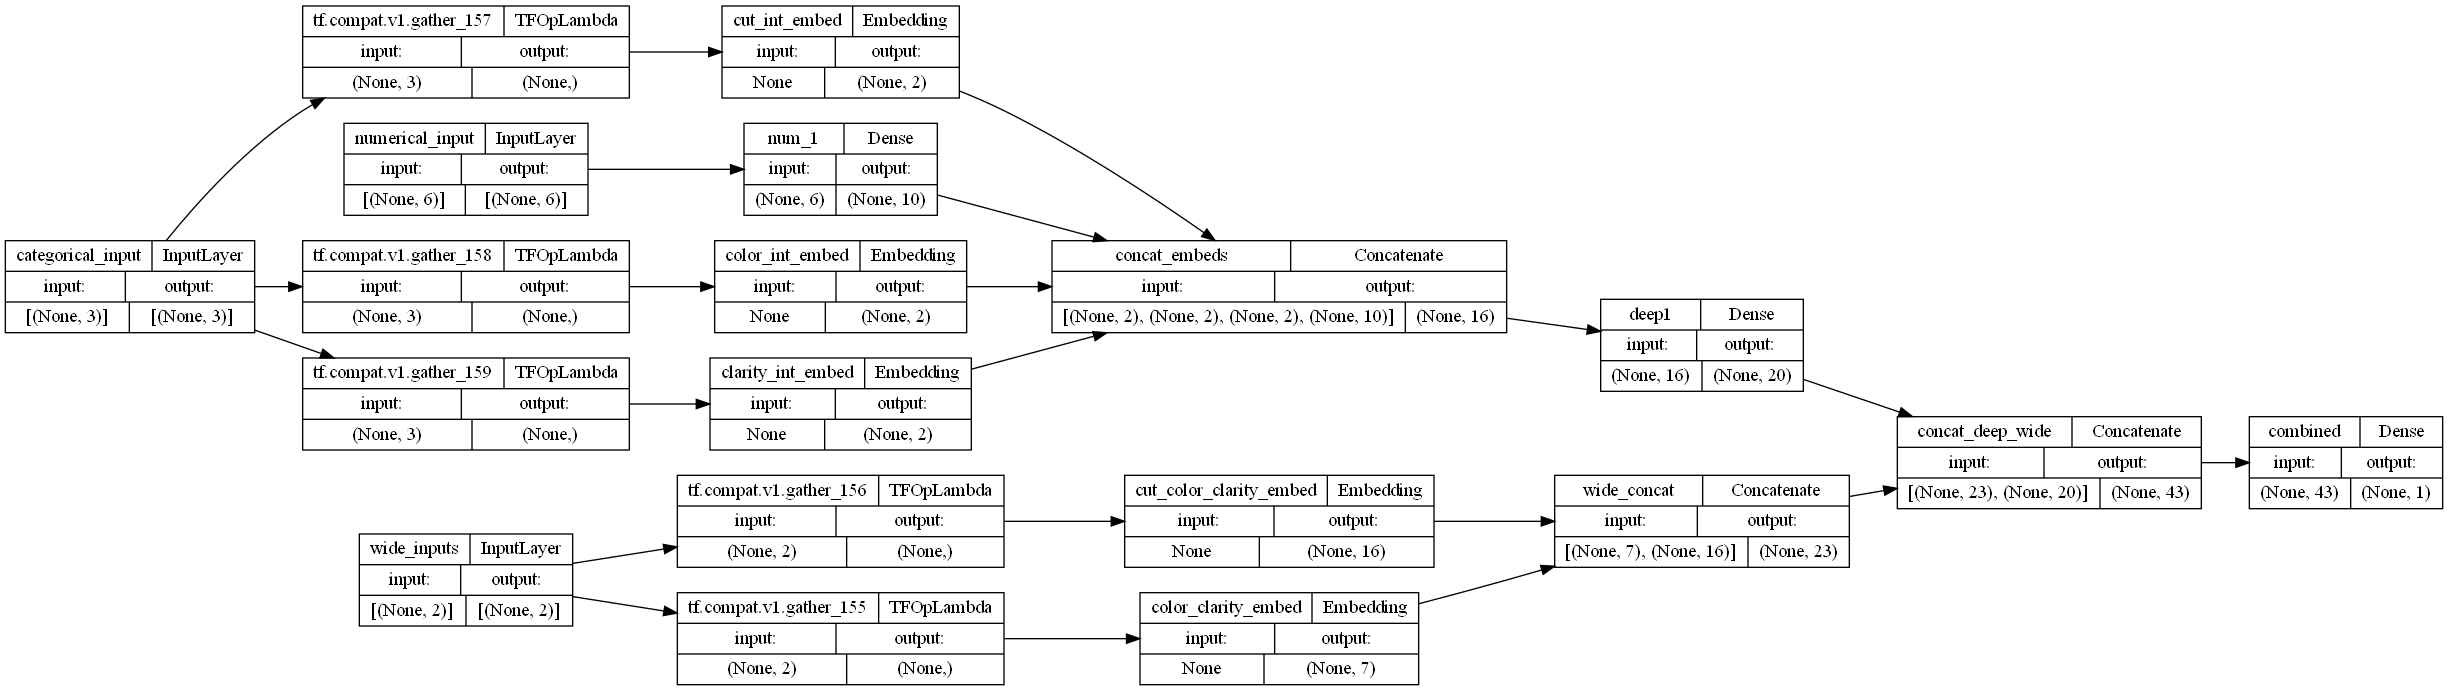

In [248]:
from tensorflow.keras.utils import plot_model
plot_model(
    model2, to_file='model.png', show_shapes=True, show_layer_names=True,
    rankdir='LR', expand_nested=False, dpi=96
)

In [249]:
%%time

model2.compile(optimizer='SGD',
              loss='mean_squared_error',
              metrics='Accuracy')

# lets also add the history variable to see how we are doing
# and lets add a validation set to keep track of our progress
history = model2.fit([X_train_crossed,X_train_cat,X_train_num],
                    y_train, 
                    epochs=30, 
                    batch_size=32, 
                    verbose=1, 
                    validation_data = ([X_test_crossed,X_test_cat,X_test_num],y_test))

Epoch 1/30
1349/1349 [==============================] - 6s 4ms/step - loss: 0.0955 - Accuracy: 0.8984 - val_loss: 0.0682 - val_Accuracy: 0.9029
Epoch 2/30
1349/1349 [==============================] - 5s 4ms/step - loss: 0.0584 - Accuracy: 0.9168 - val_loss: 0.0500 - val_Accuracy: 0.9439
Epoch 3/30
1349/1349 [==============================] - 5s 4ms/step - loss: 0.0446 - Accuracy: 0.9493 - val_loss: 0.0407 - val_Accuracy: 0.9527
Epoch 4/30
1349/1349 [==============================] - 5s 3ms/step - loss: 0.0384 - Accuracy: 0.9524 - val_loss: 0.0367 - val_Accuracy: 0.9538
Epoch 5/30
1349/1349 [==============================] - 5s 4ms/step - loss: 0.0353 - Accuracy: 0.9536 - val_loss: 0.0345 - val_Accuracy: 0.9563
Epoch 6/30
1349/1349 [==============================] - 4s 3ms/step - loss: 0.0336 - Accuracy: 0.9555 - val_loss: 0.0331 - val_Accuracy: 0.9562
Epoch 7/30
1349/1349 [==============================] - 4s 3ms/step - loss: 0.0323 - Accuracy: 0.9570 - val_loss: 0.0320 - val_Accuracy:

In [290]:
yhat2 = np.round(model2.predict([X_test_crossed,X_test_cat,X_test_num]))
print(mt.confusion_matrix(y_test,yhat))
print(mt.classification_report(y_test,yhat))

338/338 [==============================] - 1s 2ms/step
[[ 954   94]
 [ 101 9640]]
              precision    recall  f1-score   support

           0       0.90      0.91      0.91      1048
           1       0.99      0.99      0.99      9741

    accuracy                           0.98     10789
   macro avg       0.95      0.95      0.95     10789
weighted avg       0.98      0.98      0.98     10789



Text(0.5, 0, 'epochs')

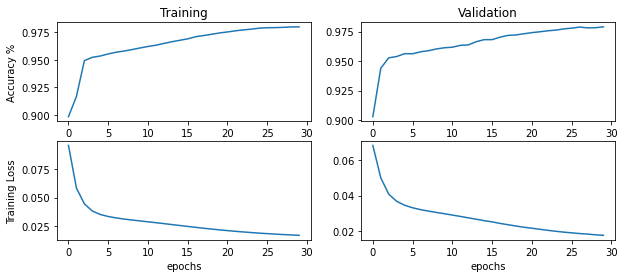

In [251]:
from matplotlib import pyplot as plt

%matplotlib inline

plt.figure(figsize=(10,4))
plt.subplot(2,2,1)
plt.plot(history.history['Accuracy'])

plt.ylabel('Accuracy %')
plt.title('Training')
plt.subplot(2,2,2)
plt.plot(history.history['val_Accuracy'])
plt.title('Validation')

plt.subplot(2,2,3)
plt.plot(history.history['loss'])
plt.ylabel('Training Loss')
plt.xlabel('epochs')

plt.subplot(2,2,4)
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')

## Wide and Deep Model 3

In [252]:
crossed_outputs = []

input_crossed = Input(shape=(X_train_crossed.shape[1],), dtype='int64', name='wide_inputs')
for idx,col in enumerate(cross_col_df_names):
    
    N = max(X_train[col].max(),X_test[col].max())+1
    
    x = tf.gather(input_crossed, idx, axis=1)
    
    x = Embedding(input_dim=N, 
                  output_dim=int(np.sqrt(N)), 
                  input_length=1, name=col+'_embed')(x)

    crossed_outputs.append(x)
    
wide_branch = concatenate(crossed_outputs, name='wide_concat')

all_deep_branch_outputs = []

input_cat = Input(shape=(X_train_cat.shape[1],), dtype='int64', name='categorical_input')
for idx,col in enumerate(categorical_headers_ints):
    
    N = max(X_train[col].max(),X_test[col].max())+1
    
    x = tf.gather(input_cat, idx, axis=1)
    
    x = Embedding(input_dim=N, 
                  output_dim=int(np.sqrt(N)), 
                  input_length=1, name=col+'_embed')(x)
    
    all_deep_branch_outputs.append(x)

input_num = Input(shape=(X_train_num.shape[1],), name='numerical_input')
x_dense = Dense(units=10, activation='relu',name='num_1')(input_num)
    
all_deep_branch_outputs.append(x_dense)

deep_branch = concatenate(all_deep_branch_outputs,name='concat_embeds')
deep_branch = Dense(units=40,activation='relu', name='deep1')(deep_branch)
deep_branch = Dense(units=20,activation='relu', name='deep2')(deep_branch)
deep_branch = Dense(units=10,activation='relu', name='deep3')(deep_branch)

final_branch = concatenate([wide_branch, deep_branch],
                           name='concat_deep_wide')
final_branch = Dense(units=1,activation='sigmoid',
                     name='combined')(final_branch)

model3 = Model(inputs=[input_crossed,input_cat,input_num], 
              outputs=final_branch)

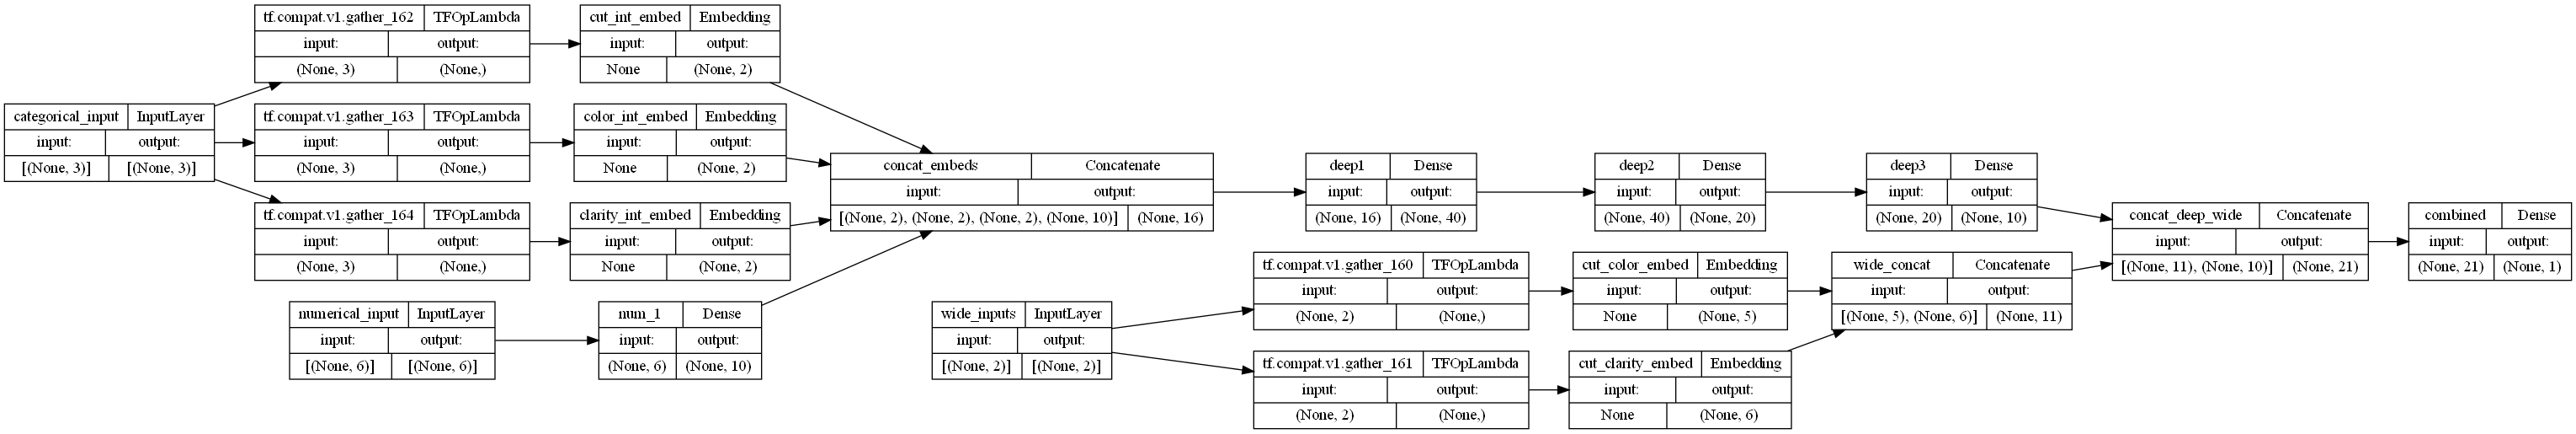

In [253]:
from tensorflow.keras.utils import plot_model
plot_model(
    model3, to_file='model.png', show_shapes=True, show_layer_names=True,
    rankdir='LR', expand_nested=False, dpi=96
)

In [254]:
%%time

model3.compile(optimizer='SGD',
              loss='mean_squared_error',
              metrics='Accuracy')

# lets also add the history variable to see how we are doing
# and lets add a validation set to keep track of our progress
history = model3.fit([X_train_crossed,X_train_cat,X_train_num],
                    y_train, 
                    epochs=30, 
                    batch_size=32, 
                    verbose=1, 
                    validation_data = ([X_test_crossed,X_test_cat,X_test_num],y_test))

Epoch 1/30
1349/1349 [==============================] - 8s 5ms/step - loss: 0.1032 - Accuracy: 0.9025 - val_loss: 0.0750 - val_Accuracy: 0.9029
Epoch 2/30
1349/1349 [==============================] - 7s 5ms/step - loss: 0.0614 - Accuracy: 0.9034 - val_loss: 0.0517 - val_Accuracy: 0.9030
Epoch 3/30
1349/1349 [==============================] - 5s 4ms/step - loss: 0.0451 - Accuracy: 0.9322 - val_loss: 0.0395 - val_Accuracy: 0.9540
Epoch 4/30
1349/1349 [==============================] - 6s 5ms/step - loss: 0.0359 - Accuracy: 0.9549 - val_loss: 0.0339 - val_Accuracy: 0.9565
Epoch 5/30
1349/1349 [==============================] - 5s 4ms/step - loss: 0.0324 - Accuracy: 0.9569 - val_loss: 0.0318 - val_Accuracy: 0.9578
Epoch 6/30
1349/1349 [==============================] - 5s 4ms/step - loss: 0.0307 - Accuracy: 0.9588 - val_loss: 0.0304 - val_Accuracy: 0.9586
Epoch 7/30
1349/1349 [==============================] - 6s 5ms/step - loss: 0.0294 - Accuracy: 0.9609 - val_loss: 0.0291 - val_Accuracy:

In [277]:
yhat3 = np.round(model3.predict([X_test_crossed,X_test_cat,X_test_num]))
print(mt.confusion_matrix(y_test,yhat))
print(mt.classification_report(y_test,yhat))

338/338 [==============================] - 3s 7ms/step
[[ 954   94]
 [ 101 9640]]
              precision    recall  f1-score   support

           0       0.90      0.91      0.91      1048
           1       0.99      0.99      0.99      9741

    accuracy                           0.98     10789
   macro avg       0.95      0.95      0.95     10789
weighted avg       0.98      0.98      0.98     10789



Text(0.5, 0, 'epochs')

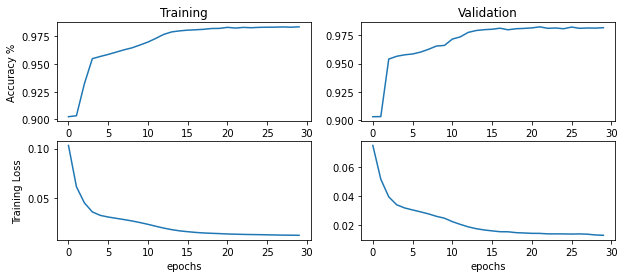

In [256]:
from matplotlib import pyplot as plt

%matplotlib inline

plt.figure(figsize=(10,4))
plt.subplot(2,2,1)
plt.plot(history.history['Accuracy'])

plt.ylabel('Accuracy %')
plt.title('Training')
plt.subplot(2,2,2)
plt.plot(history.history['val_Accuracy'])
plt.title('Validation')

plt.subplot(2,2,3)
plt.plot(history.history['loss'])
plt.ylabel('Training Loss')
plt.xlabel('epochs')

plt.subplot(2,2,4)
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')

## Deep Network Only

In [257]:
all_deep_branch_outputs = []

input_cat = Input(shape=(X_train_cat.shape[1],), dtype='int64', name='categorical_input')
for idx,col in enumerate(categorical_headers_ints):
    
    N = max(X_train[col].max(),X_test[col].max())+1
    
    x = tf.gather(input_cat, idx, axis=1)
    
    x = Embedding(input_dim=N, 
                  output_dim=int(np.sqrt(N)), 
                  input_length=1, name=col+'_embed')(x)
    
    all_deep_branch_outputs.append(x)

input_num = Input(shape=(X_train_num.shape[1],), name='numerical_input')
x_dense = Dense(units=10, activation='relu',name='num_1')(input_num)
    
all_deep_branch_outputs.append(x_dense)

deep_branch = concatenate(all_deep_branch_outputs,name='concat_embeds')
deep_branch = Dense(units=40,activation='relu', name='deep1')(deep_branch)
deep_branch = Dense(units=20,activation='relu', name='deep2')(deep_branch)
deep_branch = Dense(units=10,activation='relu', name='deep3')(deep_branch)

#final_branch = concatenate([wide_branch, deep_branch],
                           #name='concat_deep_wide')
final_branch = Dense(units=1,activation='sigmoid',
                     name='combined')(deep_branch)

model4 = Model(inputs=[input_cat,input_num], 
              outputs=final_branch)

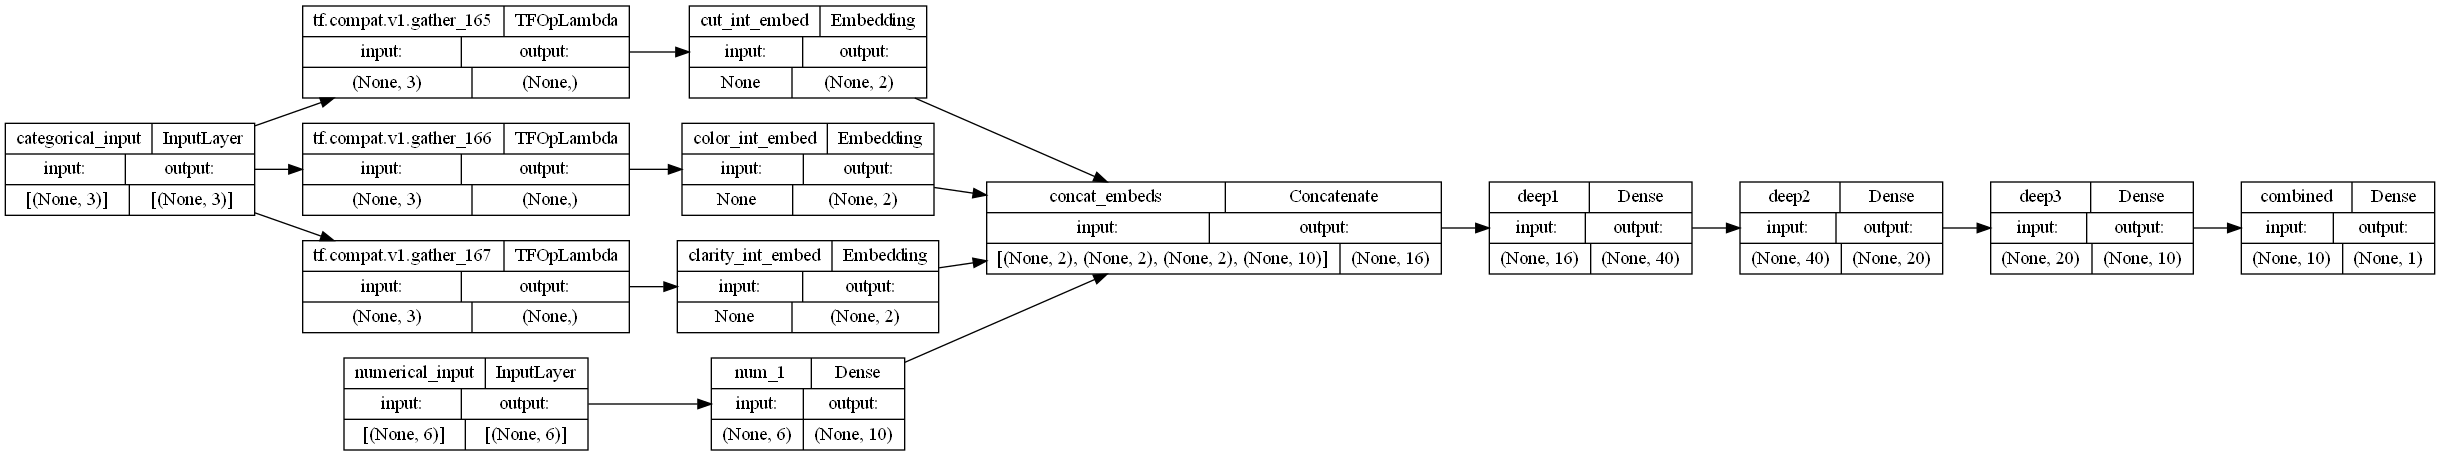

In [258]:
from tensorflow.keras.utils import plot_model
plot_model(
    model4, to_file='model.png', show_shapes=True, show_layer_names=True,
    rankdir='LR', expand_nested=False, dpi=96
)

In [217]:
%%time

model4.compile(optimizer='SGD',
              loss='mean_squared_error',
              metrics='Accuracy')

# lets also add the history variable to see how we are doing
# and lets add a validation set to keep track of our progress
history = model4.fit([X_train_cat,X_train_num],
                    y_train, 
                    epochs=30, 
                    batch_size=32, 
                    verbose=1, 
                    validation_data = ([X_test_cat,X_test_num],y_test))

Epoch 1/30
1349/1349 [==============================] - 7s 4ms/step - loss: 0.0986 - Accuracy: 0.9046 - val_loss: 0.0491 - val_Accuracy: 0.9431
Epoch 2/30
1349/1349 [==============================] - 7s 5ms/step - loss: 0.0404 - Accuracy: 0.9500 - val_loss: 0.0362 - val_Accuracy: 0.9539
Epoch 3/30
1349/1349 [==============================] - 5s 4ms/step - loss: 0.0346 - Accuracy: 0.9538 - val_loss: 0.0336 - val_Accuracy: 0.9550
Epoch 4/30
1349/1349 [==============================] - 5s 3ms/step - loss: 0.0328 - Accuracy: 0.9549 - val_loss: 0.0324 - val_Accuracy: 0.9555
Epoch 5/30
1349/1349 [==============================] - 5s 4ms/step - loss: 0.0317 - Accuracy: 0.9567 - val_loss: 0.0319 - val_Accuracy: 0.9547
Epoch 6/30
1349/1349 [==============================] - 5s 3ms/step - loss: 0.0306 - Accuracy: 0.9582 - val_loss: 0.0305 - val_Accuracy: 0.9573
Epoch 7/30
1349/1349 [==============================] - 4s 3ms/step - loss: 0.0295 - Accuracy: 0.9607 - val_loss: 0.0296 - val_Accuracy:

In [276]:
yhat4 = np.round(model4.predict([X_test_cat,X_test_num]))
print(mt.confusion_matrix(y_test,yhat))
print(mt.classification_report(y_test,yhat))

338/338 [==============================] - 2s 5ms/step
[[ 954   94]
 [ 101 9640]]
              precision    recall  f1-score   support

           0       0.90      0.91      0.91      1048
           1       0.99      0.99      0.99      9741

    accuracy                           0.98     10789
   macro avg       0.95      0.95      0.95     10789
weighted avg       0.98      0.98      0.98     10789



Text(0.5, 0, 'epochs')

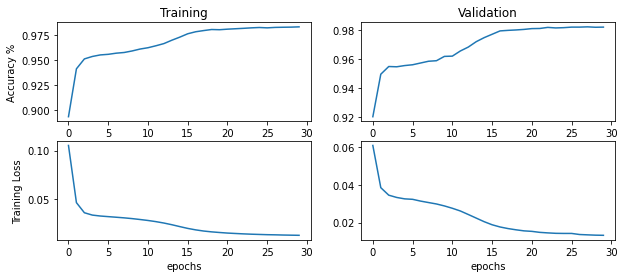

In [165]:
from matplotlib import pyplot as plt

%matplotlib inline

plt.figure(figsize=(10,4))
plt.subplot(2,2,1)
plt.plot(history.history['Accuracy'])

plt.ylabel('Accuracy %')
plt.title('Training')
plt.subplot(2,2,2)
plt.plot(history.history['val_Accuracy'])
plt.title('Validation')

plt.subplot(2,2,3)
plt.plot(history.history['loss'])
plt.ylabel('Training Loss')
plt.xlabel('epochs')

plt.subplot(2,2,4)
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')

## Mcnemar Tests

In [294]:
yhat1 = yhat1.flatten()
yhat2 = yhat2.flatten()
yhat3 = yhat3.flatten()
yhat4 = yhat4.flatten()

In [295]:
import mlxtend.evaluate
from mlxtend.evaluate import mcnemar_table, mcnemar

tb12 = mcnemar_table(y_target=y_test, 
                   y_model1=yhat1, 
                   y_model2=yhat2)
tb12 = np.array(tb12)

print('contingency tabe:\n', tb12)

chi2, p = mcnemar(ary=tb12, exact=True)

print('chi-squared:', chi2)
print('p-value:', p)

contingency tabe:
 [[10530    47]
 [   32   180]]
chi-squared: 32
p-value: 0.11466035574580133


In [298]:
tb13 = mcnemar_table(y_target=y_test, 
                   y_model1=yhat1, 
                   y_model2=yhat3)
tb13 = np.array(tb13)

print('contingency tabe:\n', tb13)

chi2, p = mcnemar(ary=tb13, exact=True)

print('chi-squared:', chi2)
print('p-value:', p)

contingency tabe:
 [[10537    40]
 [   57   155]]
chi-squared: 40
p-value: 0.10376938287271785


In [299]:
tb34 = mcnemar_table(y_target=y_test, 
                   y_model1=yhat3, 
                   y_model2=yhat4)
tb13 = np.array(tb34)

print('contingency tabe:\n', tb34)

chi2, p = mcnemar(ary=tb34, exact=True)

print('chi-squared:', chi2)
print('p-value:', p)

contingency tabe:
 [[2740 7854]
 [  94  101]]
chi-squared: 94
p-value: 0.0


## Discussion

From our Mcnemar Test between Models 1 and 2, we can see that Model 1 performs better than Model 2 because Model 2 has more wrong predictions which tells us that the cross-columns selections in Model 1 are better. Next, we need to see if Model 1 performs better than Model 3 which has the same cross-column features but Model 3 has deeper embedded layers. From the Mcnemar test between Models 1 and 3, we see that Model 1 has more wrong predictions, so therefore Model 3 is our best model. However, the p-values for each of these Mcnemar tests are greater than 0.05 so we can't say that they are significantly different with 95% confidence. 

## Receiver Operating Characteristic Curves 

338/338 [==============================] - 0s 1ms/step
No Skill: ROC AUC=0.500
Wide and Deep 1: ROC AUC=0.994
Wide and Deep 2: ROC AUC=0.993
Wide and Deep 3: ROC AUC=0.995
Deep Only: ROC AUC=0.793


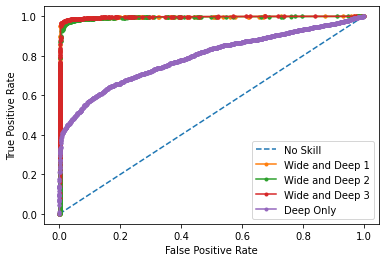

In [271]:
ns_probs = [0 for _ in range(len(y_test))]
y_prob1 = model1.predict([X_test_crossed,X_test_cat,X_test_num])
y_prob2 = model2.predict([X_test_crossed2,X_test_cat,X_test_num])
y_prob3 = model3.predict([X_test_crossed,X_test_cat,X_test_num])
y_prob4 = model4.predict([X_test_cat,X_test_num])

# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
model1_auc = roc_auc_score(y_test, y_prob1)
model2_auc = roc_auc_score(y_test, y_prob2)
model3_auc = roc_auc_score(y_test, y_prob3)
model4_auc = roc_auc_score(y_test, y_prob4)

# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Wide and Deep 1: ROC AUC=%.3f' % (model1_auc))
print('Wide and Deep 2: ROC AUC=%.3f' % (model2_auc))
print('Wide and Deep 3: ROC AUC=%.3f' % (model3_auc))
print('Deep Only: ROC AUC=%.3f' % (model4_auc))

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
model1_fpr, model1_tpr, _ = roc_curve(y_test, y_prob1)
model2_fpr, model2_tpr, _ = roc_curve(y_test, y_prob2)
model3_fpr, model3_tpr, _ = roc_curve(y_test, y_prob3)
model4_fpr, model4_tpr, _ = roc_curve(y_test, y_prob4)

# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(model1_fpr, model1_tpr, marker='.', label='Wide and Deep 1')
pyplot.plot(model2_fpr, model2_tpr, marker='.', label='Wide and Deep 2')
pyplot.plot(model3_fpr, model3_tpr, marker='.', label='Wide and Deep 3')
pyplot.plot(model4_fpr, model4_tpr, marker='.', label='Deep Only')

# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

## ROC Discussion 

As you can see from the plot, the three Wide and Deep models performs really well and there isn't any discernible difference between them. The AUC value for Model 3 is highest, but by a marginal amount which is consistent with the Mcnemar Test results. 

### Exceptional Work

One idea (required for 7000 level students): Capture the embedding weights from the deep network and (if needed) perform dimensionality reduction on the output of these embedding layers (only if needed). That is, pass the observations into the network, save the embedded weights (called embeddings), and then perform  dimensionality reduction in order to visualize results. Visualize and explain any clusters in the data.